In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

### ЗАДАЕМ ПАРАМЕТР Θ

In [3]:
teta = 10

In [4]:
n = 100
prob = 0.95

### ГЕНЕРИРУЕМ ВЫБОРКУ

In [5]:
sample = np.round(pareto.rvs(b = teta - 1 , size = 100), 3)
print(sample)

[1.068 1.043 1.104 1.088 1.079 1.016 1.119 1.395 1.214 1.018 1.124 1.049
 1.028 1.081 1.257 1.115 1.061 1.1   1.28  1.115 1.011 1.027 1.017 1.068
 1.002 1.373 1.233 1.154 1.088 1.386 1.19  1.033 1.405 1.053 1.084 1.063
 1.382 1.136 1.047 1.209 1.047 1.061 1.179 1.165 1.129 1.089 1.078 1.128
 1.178 1.189 1.156 1.023 1.094 1.212 1.063 1.012 1.013 1.109 1.085 1.137
 1.004 1.036 1.157 2.118 1.047 1.004 1.099 1.165 1.119 1.148 1.281 1.151
 1.049 1.134 1.159 1.354 1.173 1.303 1.065 1.22  1.004 1.009 1.016 1.046
 1.006 1.009 1.683 1.007 1.077 1.313 1.042 1.017 1.234 1.035 1.08  1.051
 1.003 1.052 1.026 1.148]


In [6]:
omp = np.round(n / np.sum(np.log(sample)) + 1, 3)
print(f"Оценка методом максимального правдоподобия: {omp}")

Оценка методом максимального правдоподобия: 9.628


In [7]:
def hystogramma(x : list[float], msg) -> None:
    n = int(1 + np.log2(len(x)))
    plt.figure(figsize = (16, 8))
    plt.grid()
    plt.hist(x, bins=n, density=True, color = "royalblue")
    plt.title(msg, fontsize=20)
    plt.show()

In [8]:
nonparam_teta = np.array([])
for _ in range (1000):
    subsample = np.random.choice(sample, 100, replace = True)
    
    i_omp = np.round(n / np.sum(np.log(subsample)) + 1, 3)    
    nonparam_teta = np.append(nonparam_teta, omp - i_omp)

In [18]:
param_teta = np.array([])
for _ in range (50000):
    i_sample = np.round(pareto.rvs(b = omp - 1 , size = 100), 3)
    
    i_omp = np.round(n / np.sum(np.log(i_sample)) + 1, 3)
    param_teta = np.append(param_teta, i_omp)

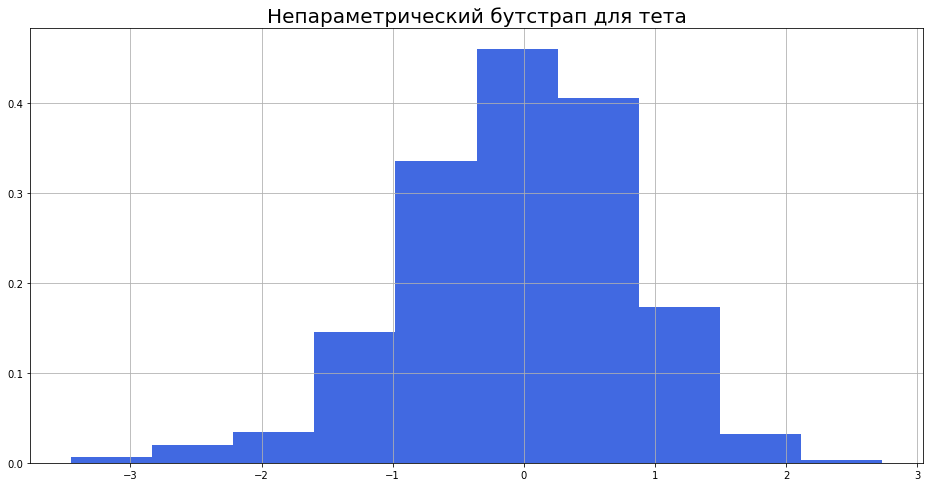

In [19]:
hystogramma(nonparam_teta, "Непараметрический бутстрап для тета")

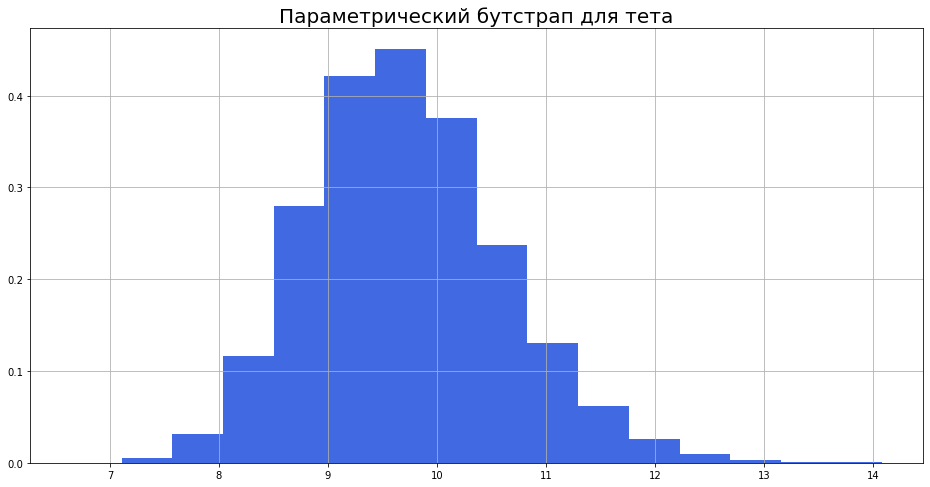

In [20]:
hystogramma(param_teta, "Параметрический бутстрап для тета")

### ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ ДЛЯ МЕДИАНЫ

In [21]:
med_coef = 1.96 * 2 ** (1 / (omp - 1)) * np.log(2) / (n ** 0.5 * (omp - 1))
calc_med = 2 ** (np.sum(np.log(sample)) / 100)
med_left = np.round(calc_med - med_coef, 3)
med_right = np.round(calc_med + med_coef, 3)
med_len = np.round(med_right - med_left, 3)
print(f"Медиана выборки: {np.median(sample)}")
print(f"Доверительный интервал для медианы: ({med_left}, {med_right}), длина интервала - {med_len} ")

Медиана выборки: 1.088
Доверительный интервал для медианы: (1.067, 1.101), длина интервала - 0.034 


### ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ ДЛЯ ТЕТА

In [22]:
coef = 1.96 / (n ** 0.5) * (omp - 1)
tetaleft = np.round(omp - coef, 3)
tetaright = np.round(omp + coef, 3)
tetalen = np.round(tetaright - tetaleft, 3)
print(f"Асимптотический доверительный интервал для тета: ({tetaleft}, {tetaright}), длина интервала - {tetalen} ")

Асимптотический доверительный интервал для тета: (7.937, 11.319), длина интервала - 3.382 


In [23]:
nonparam_teta = np.sort(nonparam_teta)
nonparam_left = omp - nonparam_teta[975]
nonparam_right = omp - nonparam_teta[25]
nonparam_len = np.round(nonparam_right - nonparam_left, 3)
print(f"Бутстраповский непараметрический доверительный интервал для тета: \
({nonparam_left}, {nonparam_right}), длина интервала - {nonparam_len} ")

Бутстраповский непараметрический доверительный интервал для тета: (8.144, 11.531), длина интервала - 3.387 


In [24]:
param_teta = np.sort(param_teta)
n1 = int(np.floor((1 - prob) / 2 * 50000))
n2 = int(np.floor((1 + prob) / 2 * 50000))
param_left = param_teta[n1]
param_right = param_teta[n2]
param_len = np.round(param_right - param_left, 3)
print(f"Бутстраповский параметрический доверительный интервал для тета: \
({param_left}, {param_right}), длина интервала - {param_len} ")

Бутстраповский параметрический доверительный интервал для тета: (8.154, 11.609), длина интервала - 3.455 


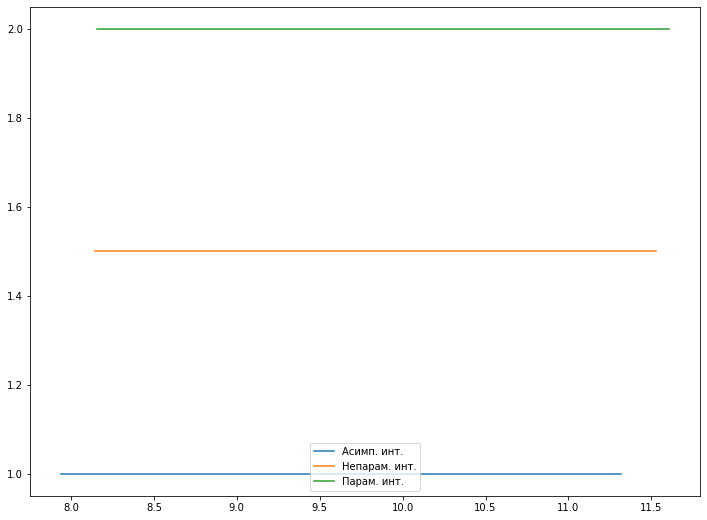

In [25]:
plt.figure(figsize = (12, 9))
plt.plot([tetaleft, tetaright], [1, 1], label = "Асимп. инт.")
plt.plot([nonparam_left, nonparam_right], [1.5, 1.5], label = "Непарам. инт.")
plt.plot([param_left, param_right], [2, 2], label = "Парам. инт.")
plt.legend()
plt.show()

In [26]:
vals = [[tetalen, "Асимптотический доверительный интервал"], 
        [param_len, "Бутстраповский параметрический интервал"], 
        [nonparam_len, "Бутстраповский непараметрический интервал"]]
shortest = min(vals, key = lambda arr : arr[0])
print(f"{shortest[1]} является самым коротким среди доверительных интервалов, его длина: {shortest[0]}")

Асимптотический доверительный интервал является самым коротким среди доверительных интервалов, его длина: 3.382
